<a href="https://colab.research.google.com/github/Myllena-lins/Analise_Dados_Suicidio/blob/main/Tecnicas_Programa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Dados Suicídio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Taxa de suicidio

In [ ]:
death_by_suicide = pd.read_csv("number-of-deaths-from-suicide-ghe.csv")

In [ ]:
death_by_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 4 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3800 non-null   object 
 1   Code                                                              3680 non-null   object 
 2   Year                                                              3800 non-null   int64  
 3   Deaths - Cause: Self-harm - Sex: Both sexes - Age_group: ALLAges  3800 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 118.9+ KB


In [ ]:
death_by_suicide.head()

,Entity,Code,Year,Deaths - Cause: Self-harm - Sex: Both sexes - Age_group: ALLAges
0,Afghanistan,AFG,2000,1020.21
1,Afghanistan,AFG,2001,1087.82
2,Afghanistan,AFG,2002,1130.85
3,Afghanistan,AFG,2003,1171.68
4,Afghanistan,AFG,2004,1242.53


In [ ]:
death_by_suicide.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Cause: Self-harm - Sex: Both sexes - Age_group: ALLAges'],
      dtype='object')

In [ ]:
(death_by_suicide["Deaths - Cause: Self-harm - Sex: Both sexes - Age_group: ALLAges"] > 0).sum()

3795

In [ ]:
death_by_suicide.groupby("Entity")["Deaths - Cause: Self-harm - Sex: Both sexes - Age_group: ALLAges"].sum()

Entity
Afghanistan    2.573173e+04
Africa         1.534128e+06
Albania        3.510430e+03
Algeria        2.348899e+04
Angola         3.321858e+04
                   ...     
Vietnam        1.223840e+05
World          1.479998e+07
Yemen          2.665828e+04
Zambia         2.724022e+04
Zimbabwe       4.279257e+04
Name: Deaths - Cause: Self-harm - Sex: Both sexes - Age_group: ALLAges, Length: 190, dtype: float64

In [ ]:
death_by_suicide[["Year", "Entity", "Deaths - Cause: Self-harm - Sex: Both sexes - Age_group: ALLAges"]].head()

,Year,Entity,Deaths - Cause: Self-harm - Sex: Both sexes - Age_group: ALLAges
0,2000,Afghanistan,1020.21
1,2001,Afghanistan,1087.82
2,2002,Afghanistan,1130.85
3,2003,Afghanistan,1171.68
4,2004,Afghanistan,1242.53


In [ ]:
death_by_suicide.groupby(["Entity", "Year", ])["Deaths - Cause: Self-harm - Sex: Both sexes - Age_group: ALLAges"].max()

Entity       Year
Afghanistan  2000    1020.21
             2001    1087.82
             2002    1130.85
             2003    1171.68
             2004    1242.53
                      ...   
Zimbabwe     2015    2480.53
             2016    2350.14
             2017    2138.99
             2018    2022.05
             2019    2068.51
Name: Deaths - Cause: Self-harm - Sex: Both sexes - Age_group: ALLAges, Length: 3800, dtype: float64

In [ ]:
death_by_suicide.shape

(3800, 4)

In [ ]:
death_by_suicide.rename(columns={"Deaths - Cause: Self-harm - Sex: Both sexes - Age_group: ALLAges": "Número de Suicídios"}, inplace=True)

In [ ]:
data_brasil = death_by_suicide[death_by_suicide["Entity"] == "Brazil"]

In [ ]:
mean_deaths_by_year = data_brasil.groupby("Year")["Número de Suicídios"].mean()

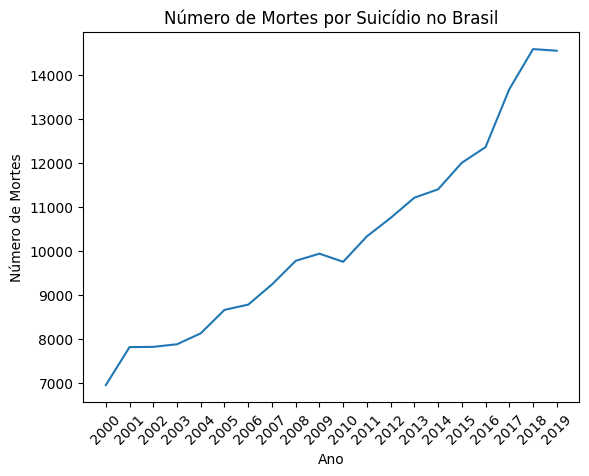

In [ ]:
mean_deaths_by_year.plot(title="Número de Mortes por Suicídio no Brasil")
plt.xlabel("Ano")
plt.ylabel("Número de Mortes")
plt.xticks(range(min(mean_deaths_by_year.index), max(mean_deaths_by_year.index)+1, 1), rotation=45)
plt.show()

In [ ]:
data_argentina = death_by_suicide[death_by_suicide["Entity"] == "Argentina"]

In [ ]:
mean_deaths_by_year = data_argentina.groupby("Year")["Número de Suicídios"].mean()

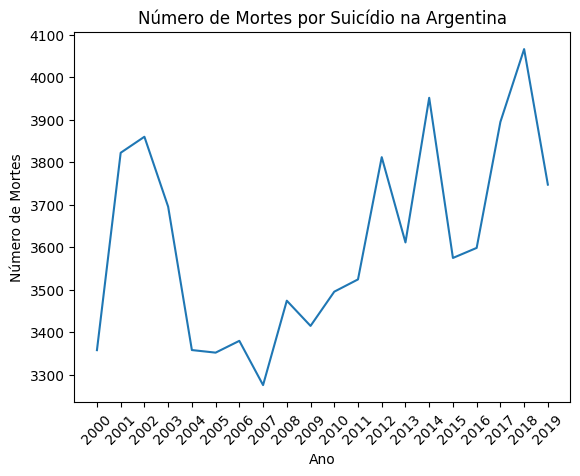

In [ ]:
mean_deaths_by_year.plot(title="Número de Mortes por Suicídio na Argentina")
plt.xlabel("Ano")
plt.ylabel("Número de Mortes")
plt.xticks(range(min(mean_deaths_by_year.index), max(mean_deaths_by_year.index)+1, 1), rotation=45)
plt.show()

In [ ]:
data_eua = death_by_suicide[death_by_suicide["Entity"] == "United States"]

In [ ]:
mean_deaths_by_year = data_eua.groupby("Year")["Número de Suicídios"].mean()

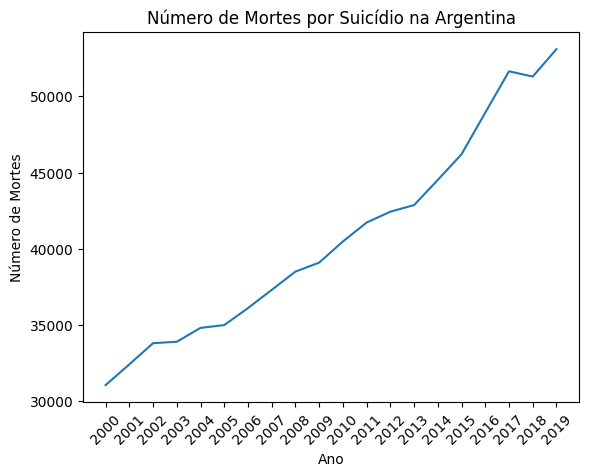

In [ ]:
mean_deaths_by_year.plot(title="Número de Mortes por Suicídio na Argentina")
plt.xlabel("Ano")
plt.ylabel("Número de Mortes")
plt.xticks(range(min(mean_deaths_by_year.index), max(mean_deaths_by_year.index)+1, 1), rotation=45)
plt.show()

In [ ]:
death_by_suicide_agrupado = death_by_suicide[death_by_suicide["Entity"].isin(["Brazil", "United Kingdom"])].groupby(
    ["Year", "Entity"])["Número de Suicídios"].mean().unstack().reset_index()

In [ ]:
death_by_suicide_agrupado["Year"] = death_by_suicide_agrupado["Year"].astype(int)

In [ ]:
anos_desejados = range(death_by_suicide_agrupado["Year"].min(), death_by_suicide_agrupado["Year"].max() + 1)

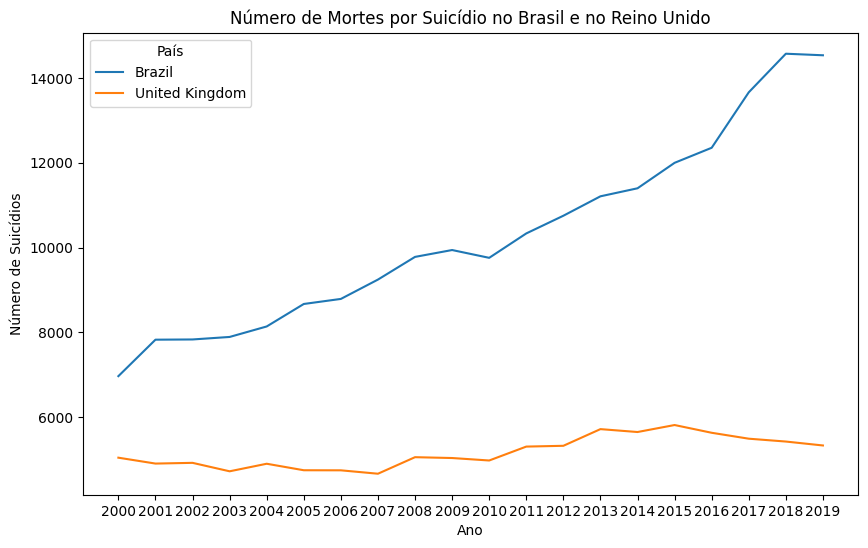

In [ ]:
death_by_suicide_agrupado[death_by_suicide_agrupado["Year"].isin(anos_desejados)].plot(x="Year", figsize=(10, 6))
plt.xlabel("Ano")
plt.ylabel("Número de Suicídios")
plt.title("Número de Mortes por Suicídio no Brasil e no Reino Unido")
plt.legend(title='País')
plt.xticks(anos_desejados)
plt.show()


In [ ]:
death_by_suicide_agrupado = death_by_suicide[death_by_suicide["Entity"].isin(["Brazil", "South Africa"])].groupby(
    ["Year", "Entity"])["Número de Suicídios"].mean().unstack().reset_index()

In [ ]:
anos_desejados = range(death_by_suicide_agrupado["Year"].min(), death_by_suicide_agrupado["Year"].max() + 1)

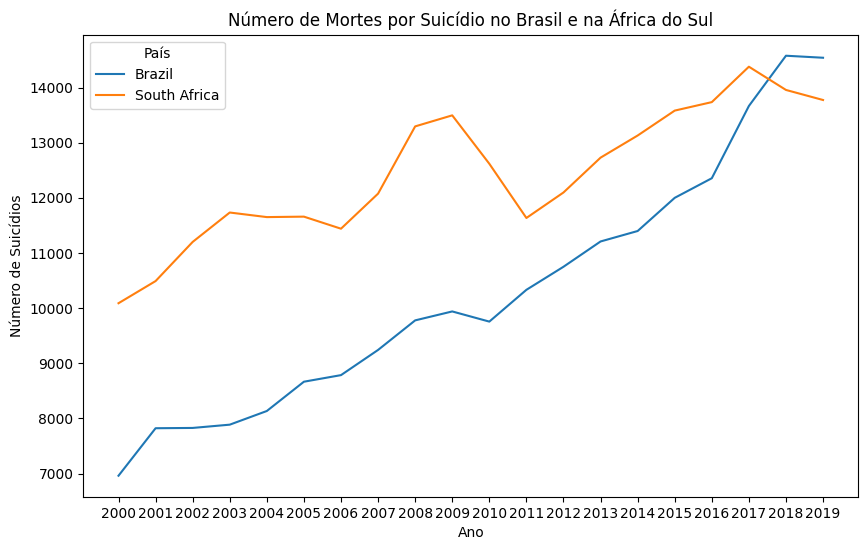

In [ ]:
death_by_suicide_agrupado[death_by_suicide_agrupado["Year"].isin(anos_desejados)].plot(x="Year", figsize=(10, 6))
plt.xlabel("Ano")
plt.ylabel("Número de Suicídios")
plt.title("Número de Mortes por Suicídio no Brasil e na África do Sul")
plt.legend(title='País')
plt.xticks(anos_desejados)
plt.show()

In [ ]:
death_by_suicide_to_plot = death_by_suicide[death_by_suicide["Entity"].isin(["Brazil", "Spain"])][["Year", "Número de Suicídios", "Entity"]]

In [ ]:
death_by_suicide_to_plot["Year"] = death_by_suicide_to_plot["Year"].astype(int)

In [ ]:
anos_desejados = range(death_by_suicide_to_plot["Year"].min(), death_by_suicide_to_plot["Year"].max() + 1)

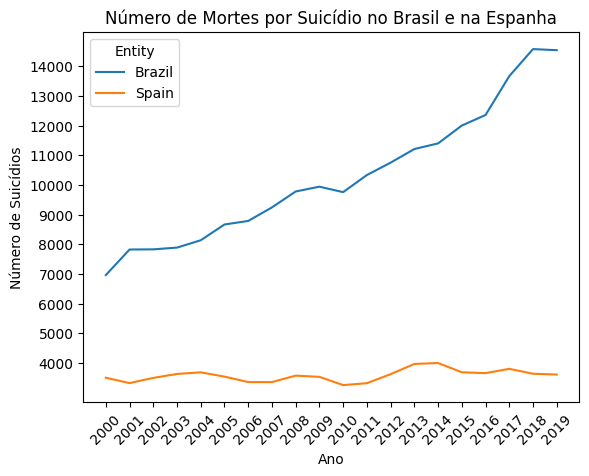

In [ ]:
sns.lineplot(data=death_by_suicide_to_plot,
             x="Year",
             y="Número de Suicídios",
             hue="Entity"
            )
plt.xlabel("Ano")
plt.ylabel("Número de Suicídios")
plt.title("Número de Mortes por Suicídio no Brasil e na Espanha")
plt.xticks(anos_desejados, rotation=45)
plt.yticks(range(4000, 14001, 1000))
plt.show()

Taxa de Suicidio Homem vs Mulher

In [ ]:
male_and_female_suicide = pd.read_csv("male-vs-female-suicide-who.csv")

In [ ]:
male_and_female_suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78526 entries, 0 to 78525
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Entity                                       78526 non-null  object 
 1   Code                                         73742 non-null  object 
 2   Year                                         78526 non-null  int64  
 3   Age-standardized suicide rate - Sex: male    3880 non-null   float64
 4   Age-standardized suicide rate - Sex: female  3880 non-null   float64
 5   Population                                   78318 non-null  float64
 6   Continent                                    285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 4.2+ MB


In [ ]:
male_and_female_suicide.rename(columns={
    'Age-standardized suicide rate - Sex: male': 'Suicídios Sexo Masculino',
    'Age-standardized suicide rate - Sex: female': 'Suicídios Sexo Feminino'
}, inplace=True)

In [ ]:
male_and_female_suicide = male_and_female_suicide.dropna(subset=['Suicídios Sexo Masculino', 'Suicídios Sexo Feminino'])

In [ ]:
all_years = np.arange(2000, 2020)

In [ ]:
male_and_female_suicide_agrupado = male_and_female_suicide_agrupado.reindex(all_years, fill_value=0)
population_total = population_total.reindex(all_years, fill_value=0)

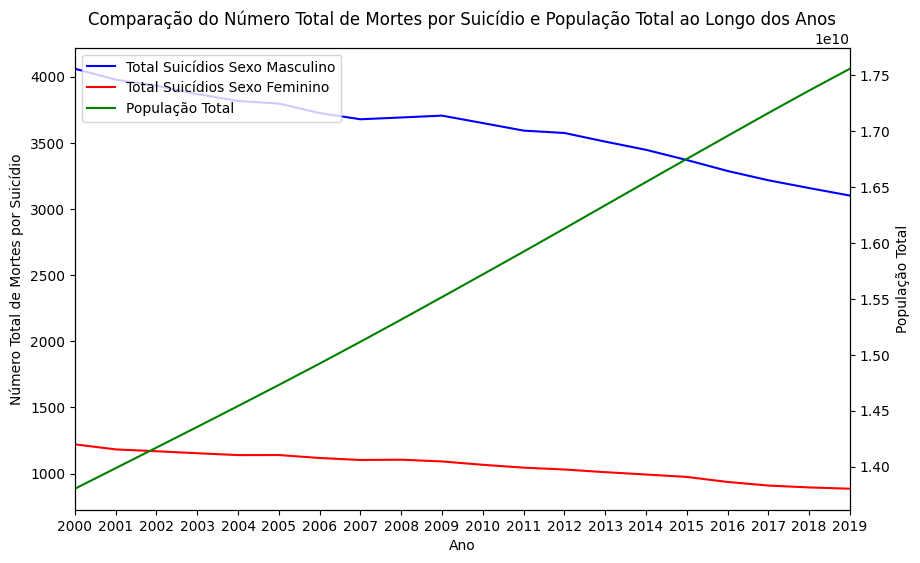

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(male_and_female_suicide_agrupado.index, male_and_female_suicide_agrupado['Suicídios Sexo Masculino'], color='blue', label='Total Suicídios Sexo Masculino')
ax1.plot(male_and_female_suicide_agrupado.index, male_and_female_suicide_agrupado['Suicídios Sexo Feminino'], color='red', label='Total Suicídios Sexo Feminino')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Número Total de Mortes por Suicídio')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(population_total.index, population_total, color='green', label='População Total')
ax2.set_ylabel('População Total')
ax2.tick_params(axis='y')

linhas, labels = ax1.get_legend_handles_labels()
linhas2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(linhas + linhas2, labels + labels2, loc='upper left')

ax1.set_xlim(2000, 2019)
ax1.set_xticks(range(2000, 2020))

plt.title('Comparação do Número Total de Mortes por Suicídio e População Total ao Longo dos Anos')

plt.show()


In [ ]:
male_and_female_suicide['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominican Republic', 'East Timor',
       'Eastern Mediterranean', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', '

In [ ]:
continent_data = {}
for continent in male_and_female_suicide['Continent'].unique():
    continent_data[continent] = male_and_female_suicide[male_and_female_suicide['Continent'] == continent]

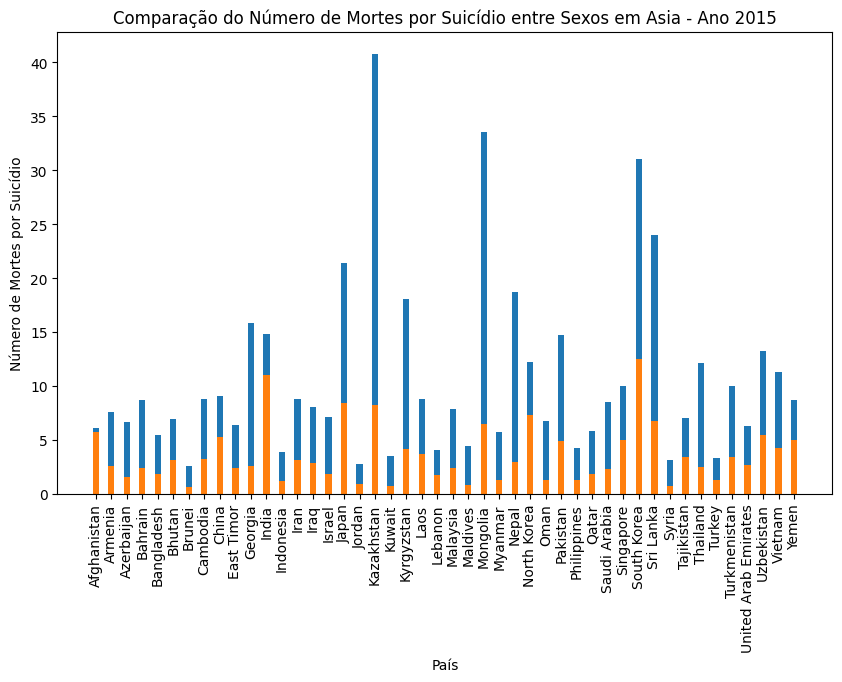

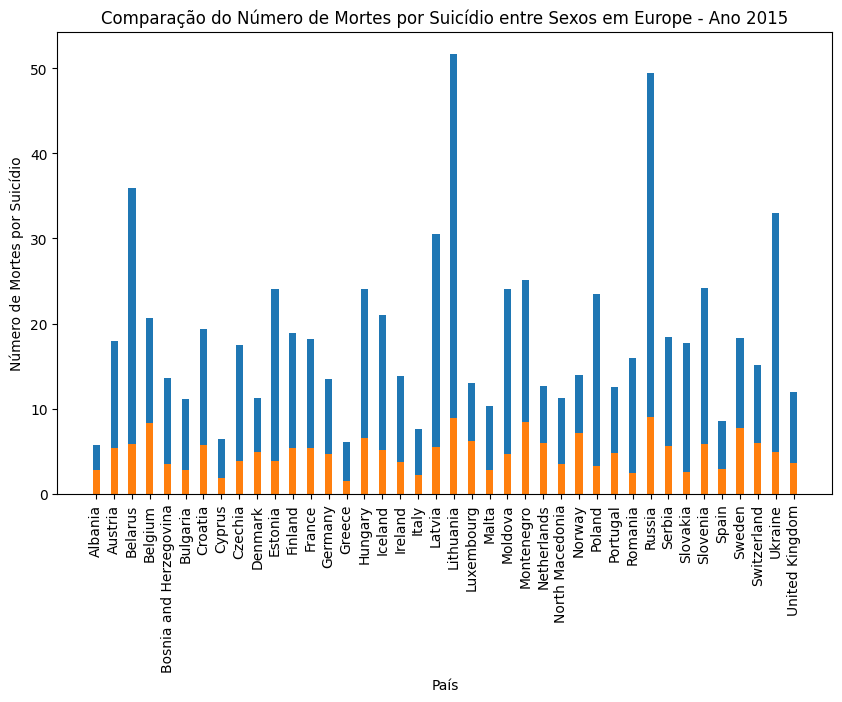

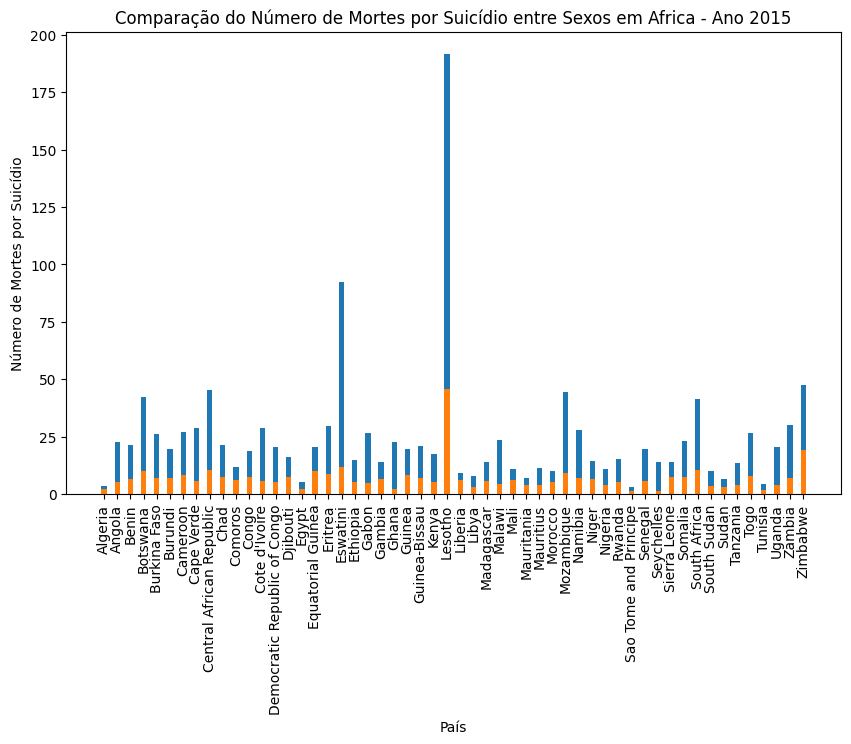

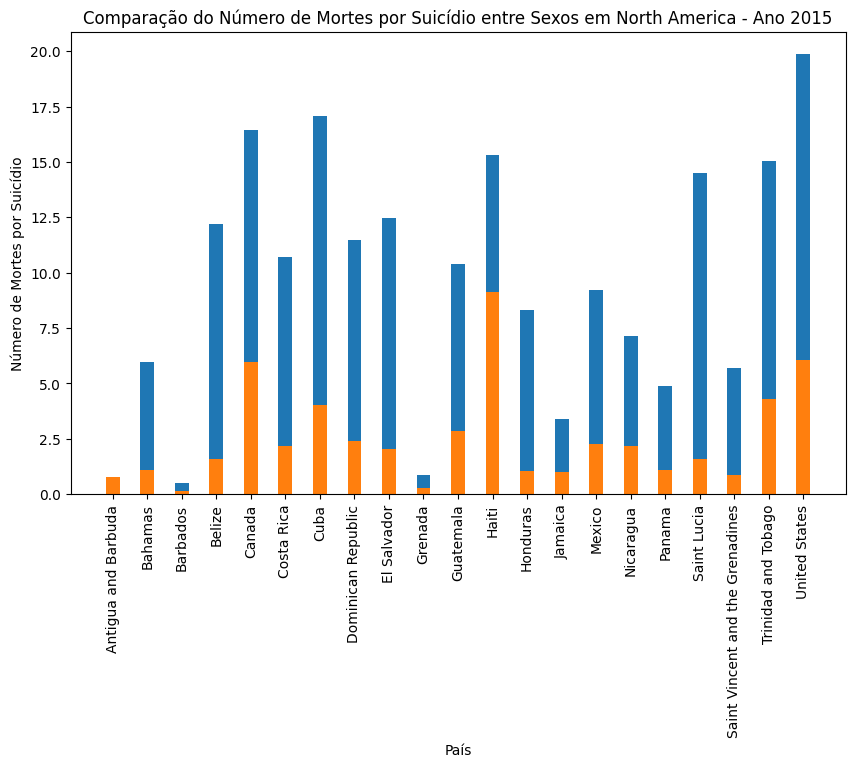

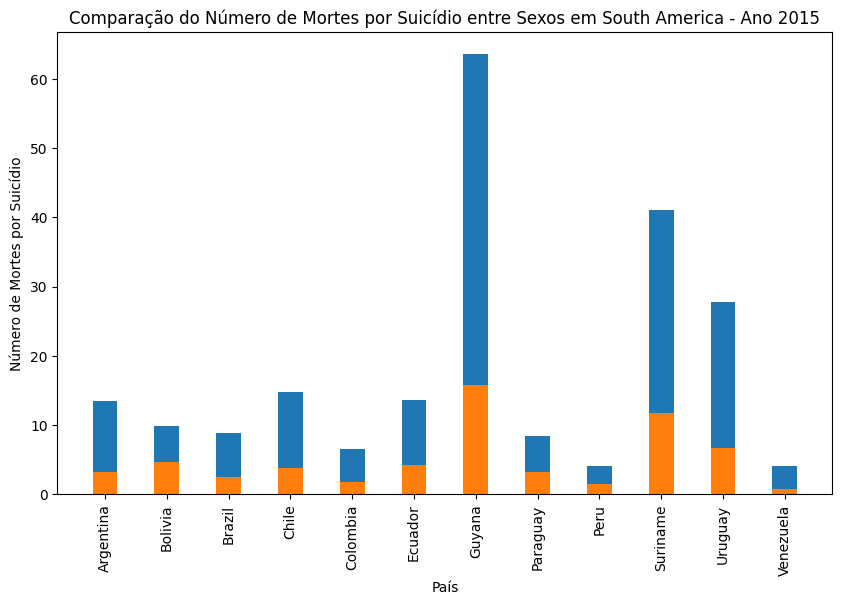

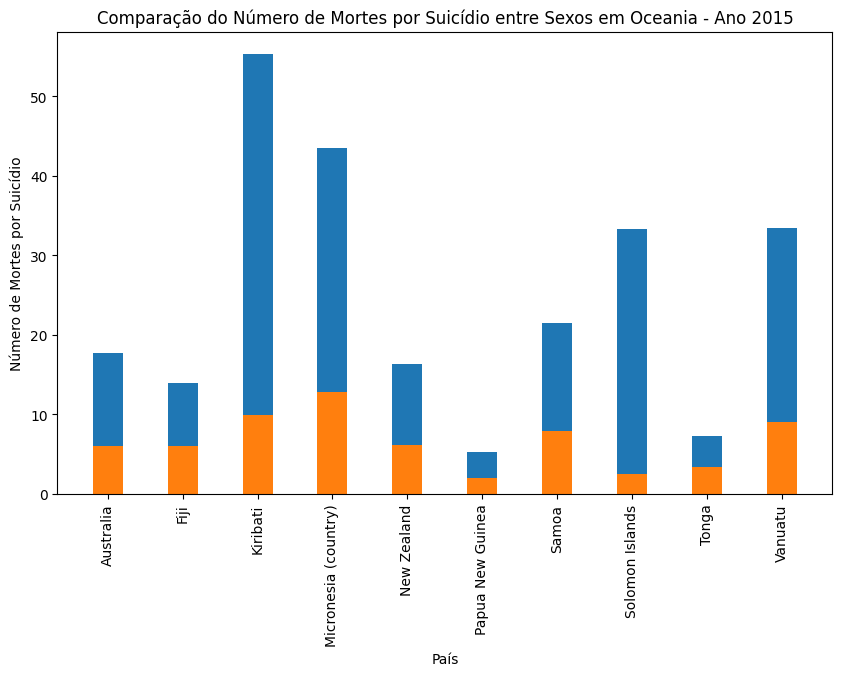

In [ ]:
for continent, countries_df in continent_data.items():
    for year in range(2000, 2020):
        year_data = countries_df[countries_df['Year'] == year]

        if not year_data.empty:
            plt.figure(figsize=(10, 6))

            x = range(len(year_data))
            plt.bar(x, year_data['Suicídios Sexo Masculino'], width=0.4, label='Masculino')
            plt.bar(x, year_data['Suicídios Sexo Feminino'], width=0.4, label='Feminino')

            plt.xlabel('País')
            plt.ylabel('Número de Mortes por Suicídio')
            plt.title(f'Comparação do Número de Mortes por Suicídio entre Sexos em {continent} - Ano {year}')
            plt.xticks(x, year_data['Entity'], rotation=90)

            plt.show()

#Professor não conseguir gerar o gráfico para cada ano, só para o ano de 2015
#Tem outra forma abaixo dessa que mostra como o ChatGPT faria, mas esta dando o mesmo problema
#Eu especifiquei cada ano, mas não gera o gráfico, só do ano de 2015

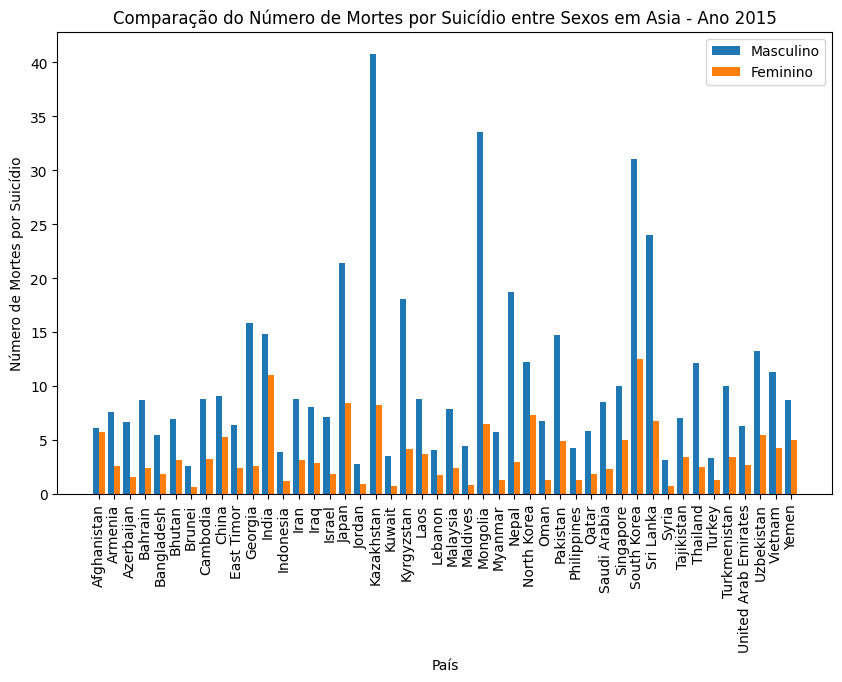

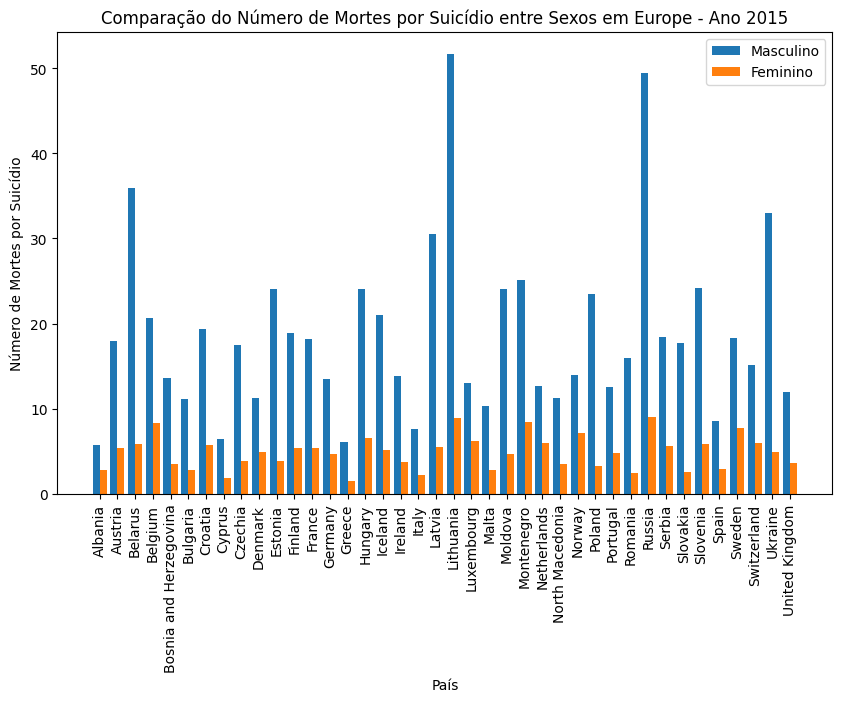

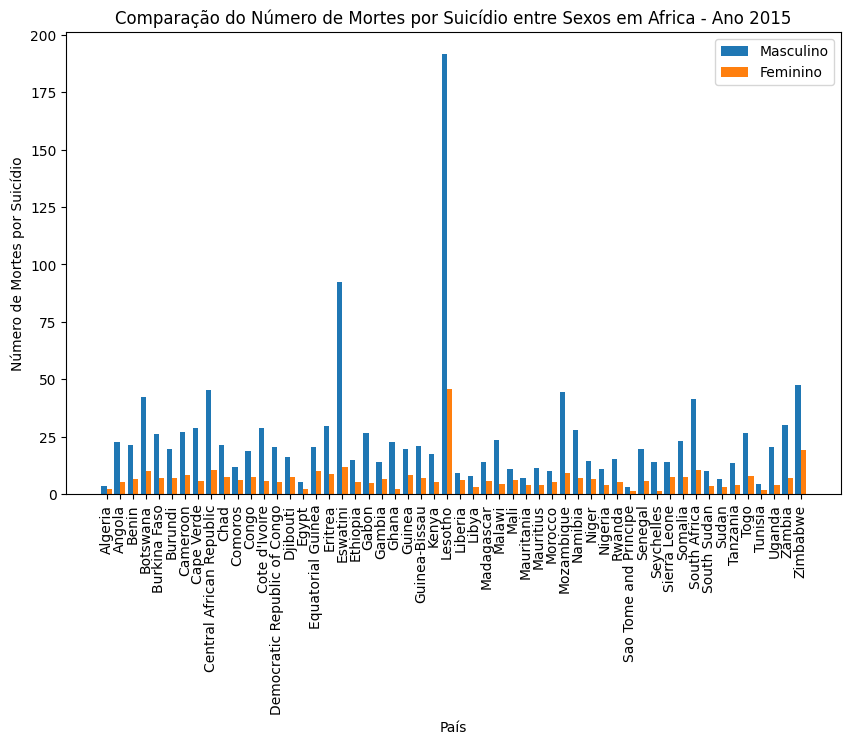

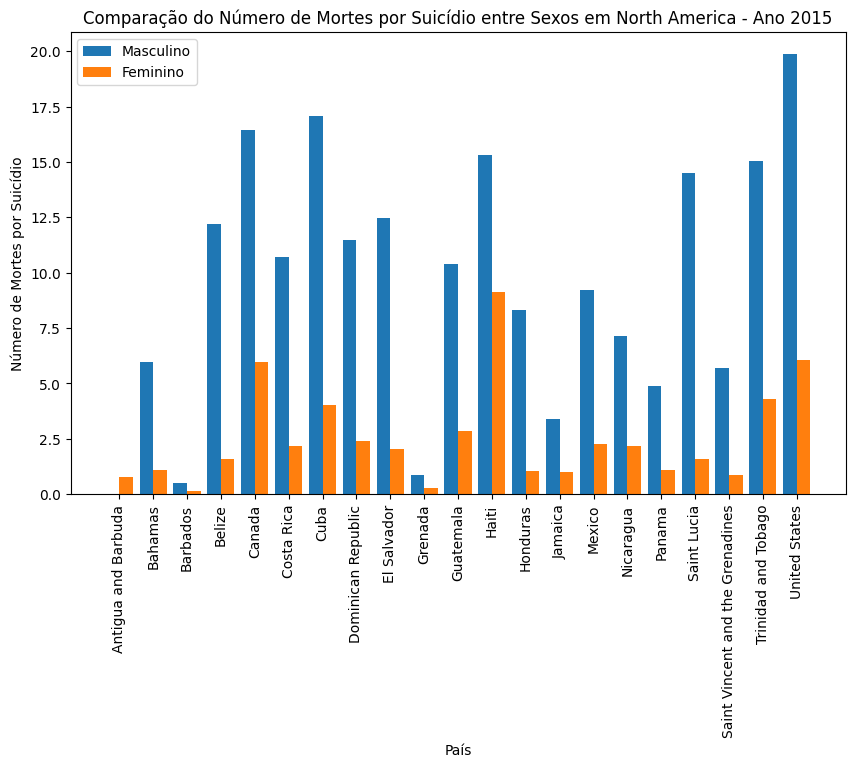

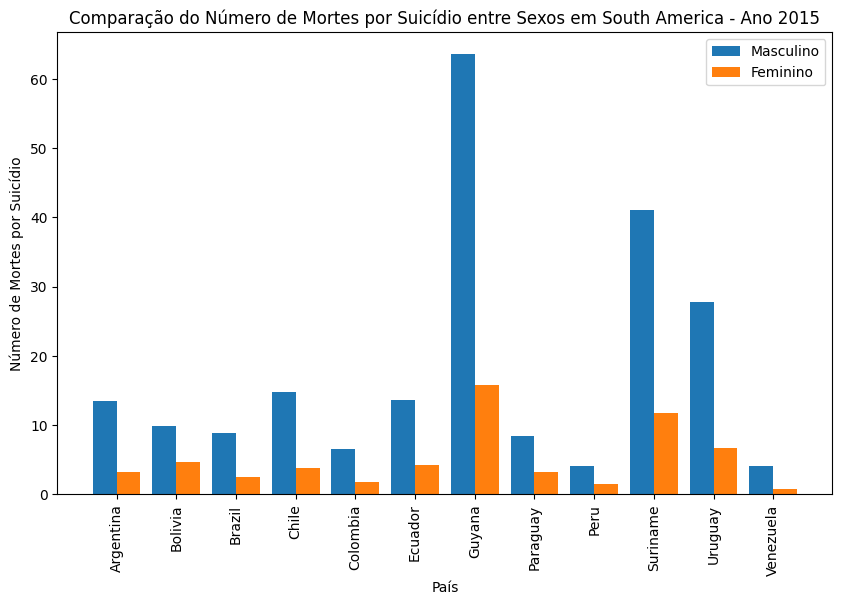

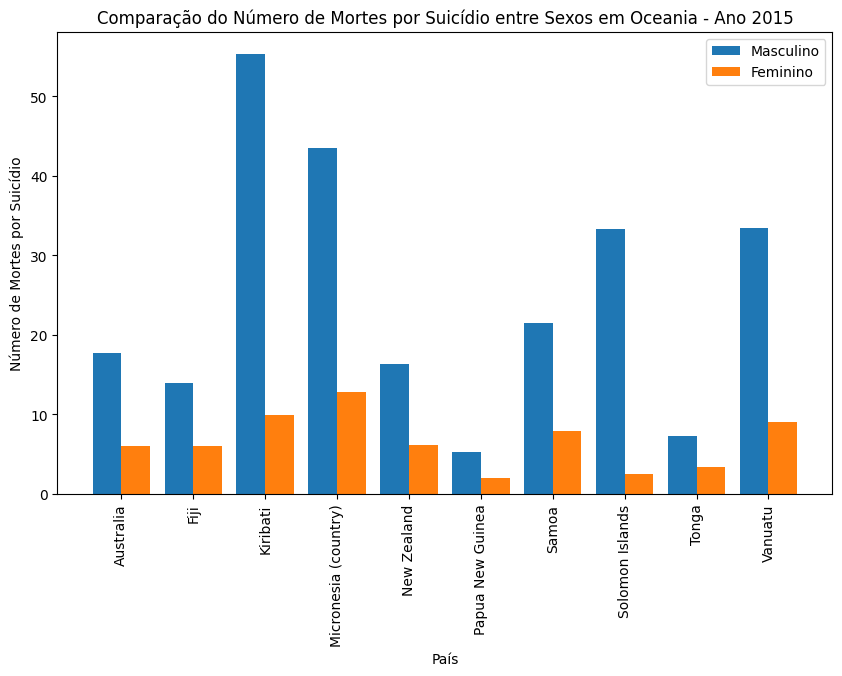

In [ ]:
#Código do ChatGPT
def plot_year_data_for_all_continents(year):
    for continent, countries_df in continent_data.items():
        year_data = countries_df[countries_df['Year'] == year]

        if not year_data.empty:
            fig, ax = plt.subplots(figsize=(10, 6))

            x = range(len(year_data))
            ax.bar(x, year_data['Suicídios Sexo Masculino'], width=0.4, label='Masculino')
            ax.bar([i + 0.4 for i in x], year_data['Suicídios Sexo Feminino'], width=0.4, label='Feminino')

            ax.set_xlabel('País')
            ax.set_ylabel('Número de Mortes por Suicídio')
            ax.set_title(f'Comparação do Número de Mortes por Suicídio entre Sexos em {continent} - Ano {year}')
            ax.set_xticks([i + 0.2 for i in x])
            ax.set_xticklabels(year_data['Entity'], rotation=90)

            plt.show()

plot_year_data_for_all_continents(2015)

In [ ]:
pais_especifico='Brazil'

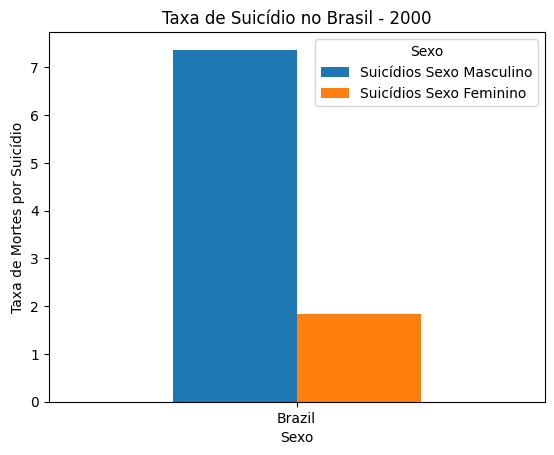

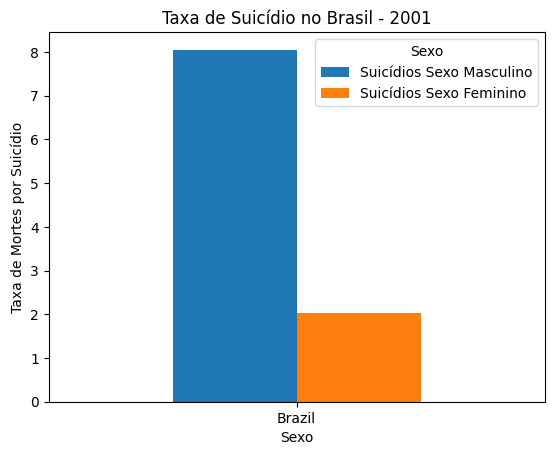

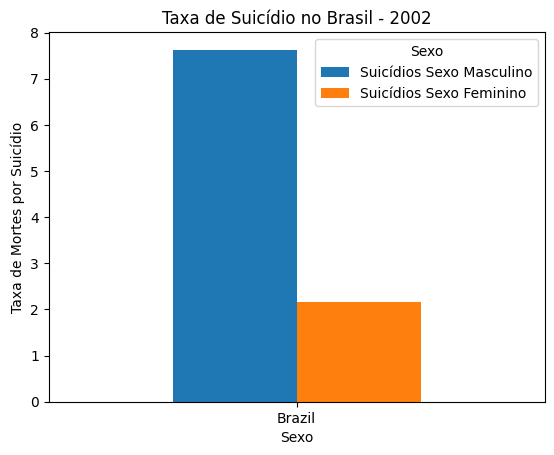

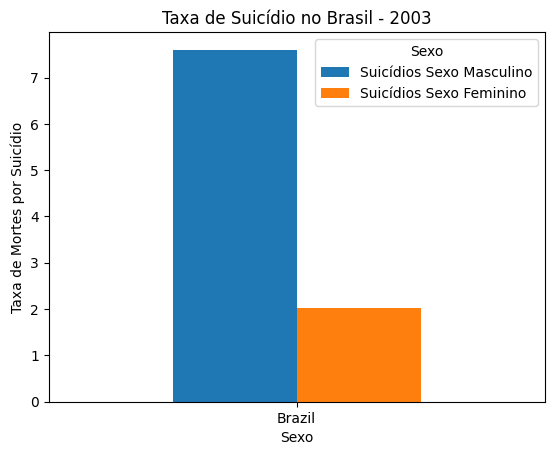

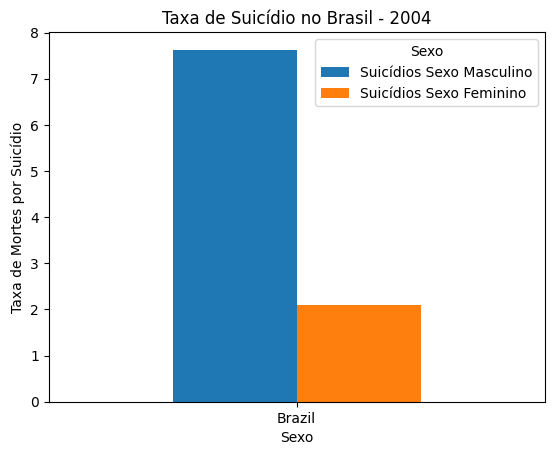

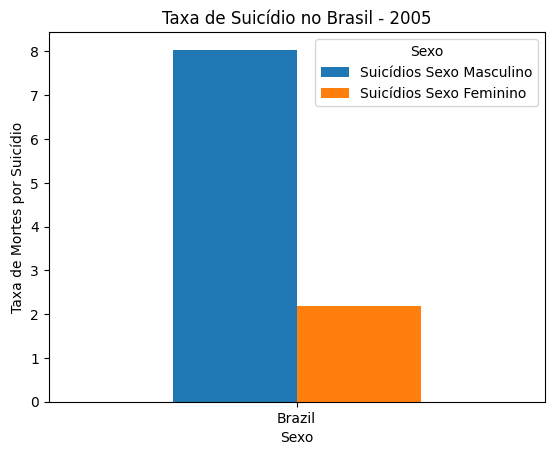

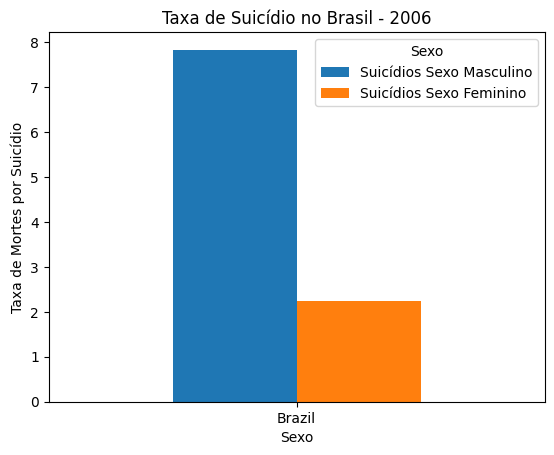

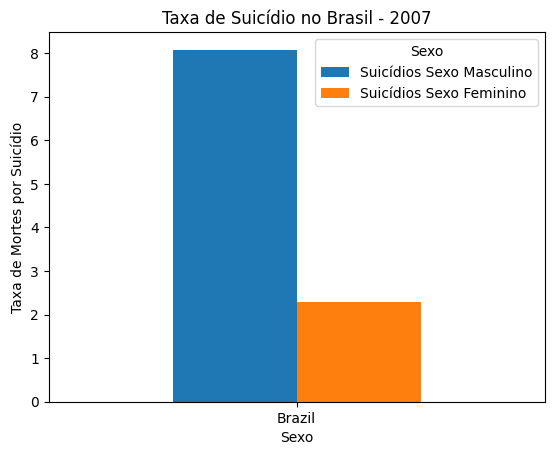

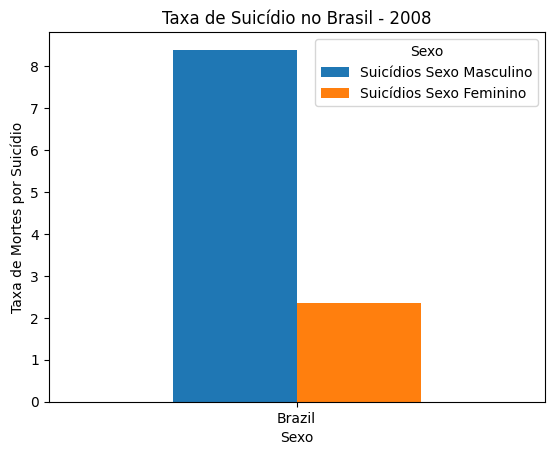

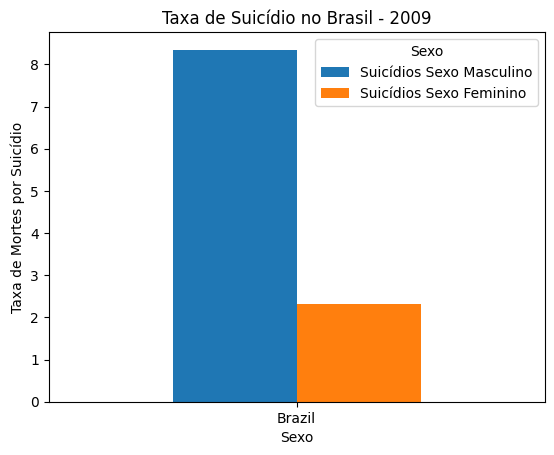

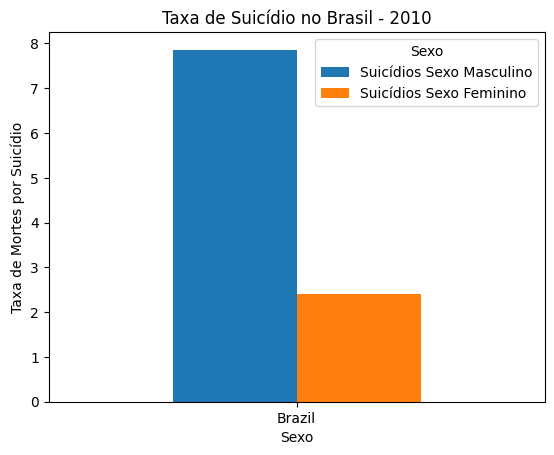

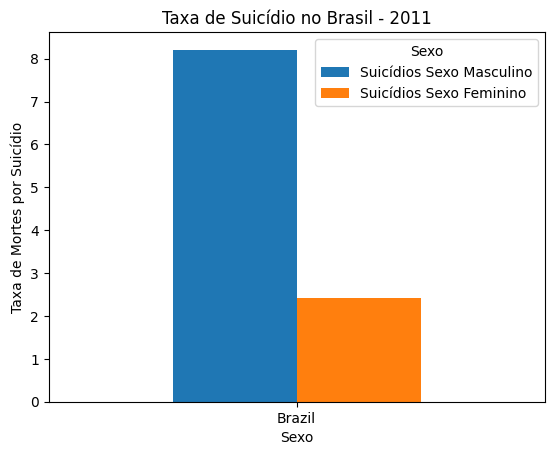

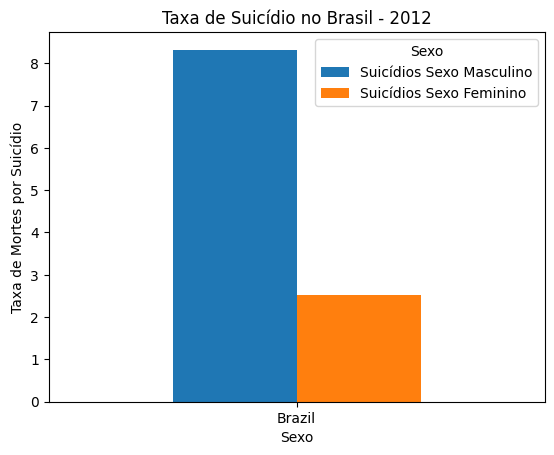

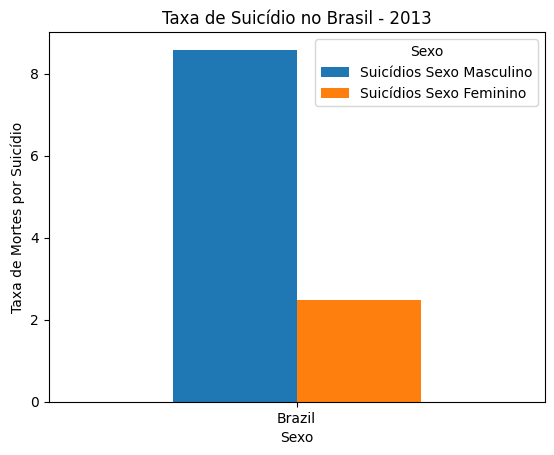

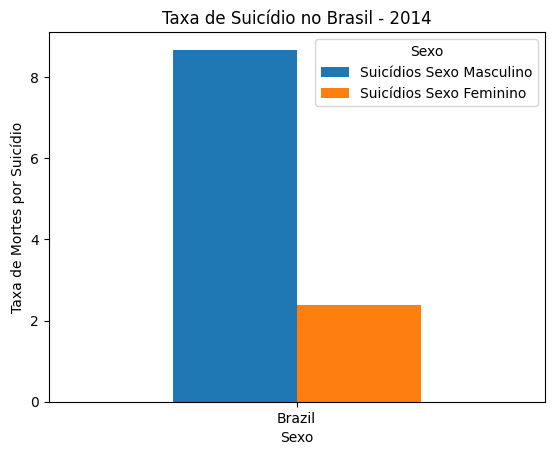

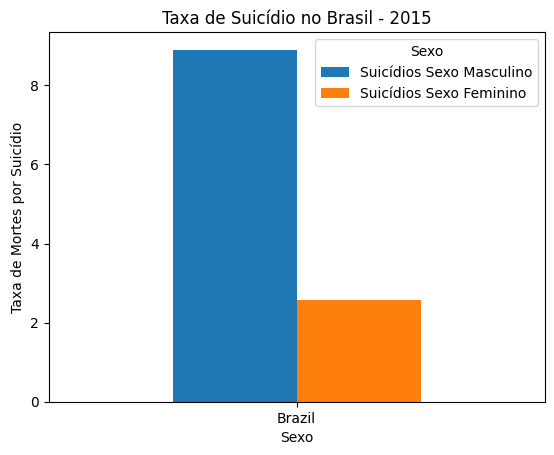

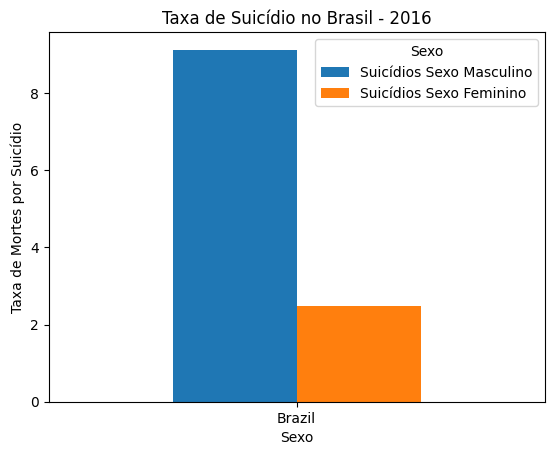

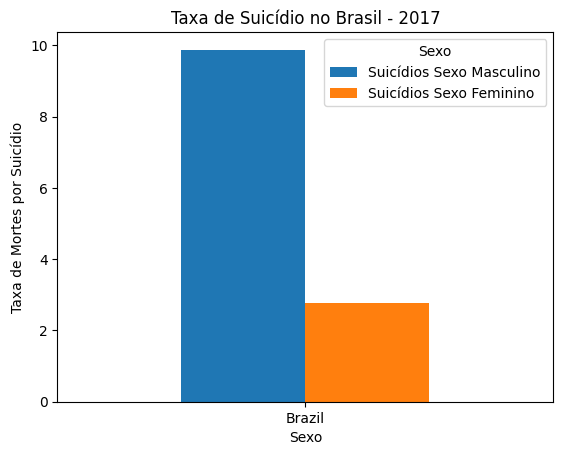

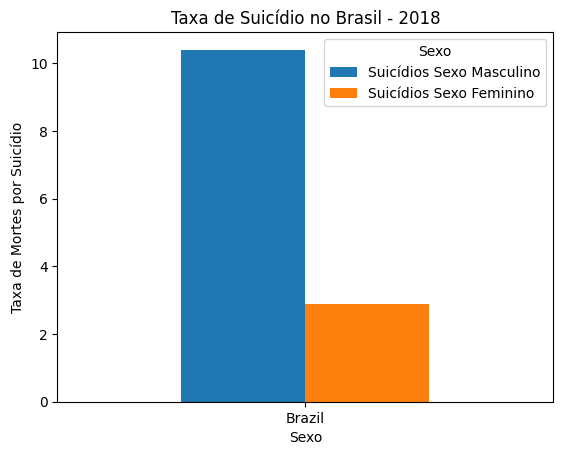

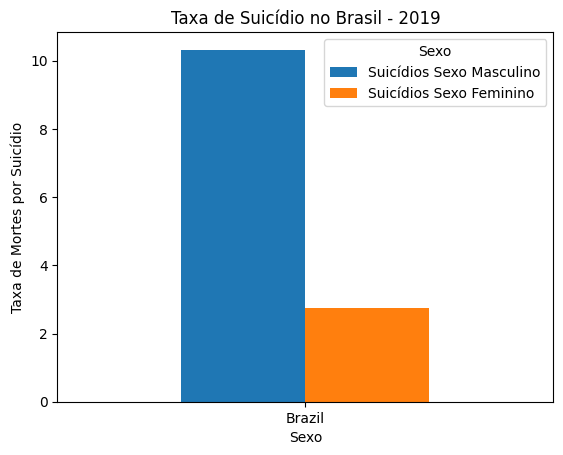

In [ ]:
for ano_especifico in range(2000, 2020):
    male_and_female_suicide_pais_ano_especifico = male_and_female_suicide[(male_and_female_suicide['Year'] == ano_especifico) & (male_and_female_suicide['Entity'] == pais_especifico)]
    if not male_and_female_suicide_pais_ano_especifico.empty:
        ax = male_and_female_suicide_pais_ano_especifico.plot(kind='bar', x='Entity', y=['Suicídios Sexo Masculino', 'Suicídios Sexo Feminino'])
        plt.xlabel("Sexo")
        plt.ylabel("Taxa de Mortes por Suicídio")
        plt.title("Taxa de Suicídio no Brasil - {}".format(ano_especifico))
        plt.legend(title='Sexo')
        plt.xticks(rotation=0)

        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

        plt.show()

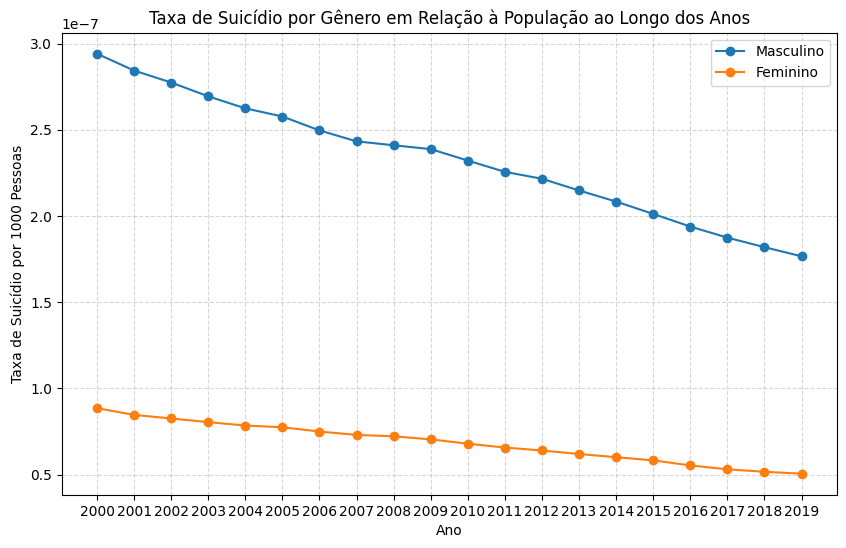

In [ ]:
male_suicide_sum = male_and_female_suicide.groupby('Year')['Suicídios Sexo Masculino'].sum()
female_suicide_sum = male_and_female_suicide.groupby('Year')['Suicídios Sexo Feminino'].sum()
population_sum = male_and_female_suicide.groupby('Year')['Population'].sum()

anos = range(2000, 2020)

plt.figure(figsize=(10, 6))
plt.plot(male_suicide_sum.index, male_suicide_sum / population_sum, label='Masculino', marker='o')
plt.plot(female_suicide_sum.index, female_suicide_sum / population_sum, label='Feminino', marker='o')

plt.xlabel("Ano")
plt.ylabel("Taxa de Suicídio por 1000 Pessoas")
plt.title("Taxa de Suicídio por Gênero em Relação à População ao Longo dos Anos")
plt.legend()

plt.xticks(anos)

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [ ]:
pais_1= 'Brazil'
pais_2='Argentina'

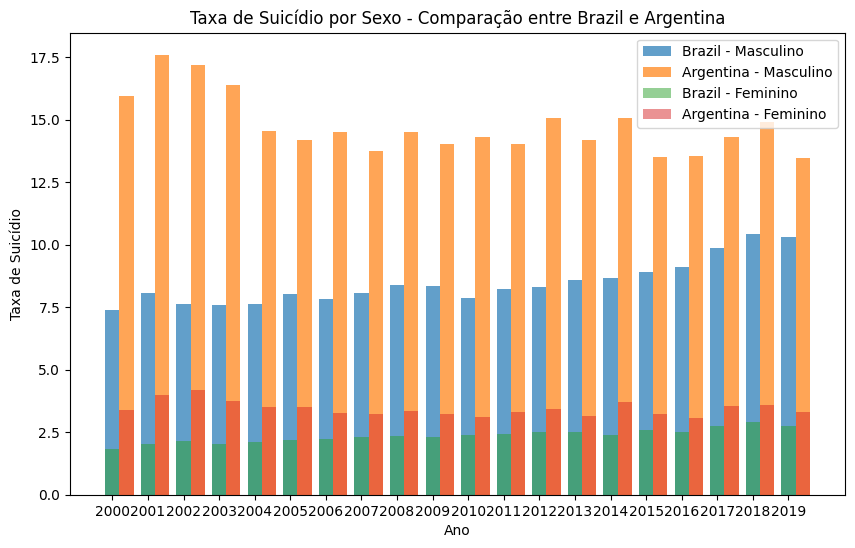

In [ ]:
male_and_female_suicide_brazil = male_and_female_suicide[(male_and_female_suicide['Entity'] == pais_1)]
male_and_female_suicide_argentina = male_and_female_suicide[(male_and_female_suicide['Entity'] == pais_2)]

plt.figure(figsize=(10, 6))

plt.bar(male_and_female_suicide_brazil['Year'], male_and_female_suicide_brazil['Suicídios Sexo Masculino'], width=0.4, label=f'{pais_1} - Masculino', align='center', alpha=0.7)
plt.bar(male_and_female_suicide_argentina['Year'] + 0.4, male_and_female_suicide_argentina['Suicídios Sexo Masculino'], width=0.4, label=f'{pais_2} - Masculino', align='center', alpha=0.7)

plt.bar(male_and_female_suicide_brazil['Year'], male_and_female_suicide_brazil['Suicídios Sexo Feminino'], width=0.4, label=f'{pais_1} - Feminino', align='center', alpha=0.5)
plt.bar(male_and_female_suicide_argentina['Year'] + 0.4, male_and_female_suicide_argentina['Suicídios Sexo Feminino'], width=0.4, label=f'{pais_2} - Feminino', align='center', alpha=0.5)

plt.xlabel("Ano")
plt.ylabel("Taxa de Suicídio")
plt.title("Taxa de Suicídio por Sexo - Comparação entre {} e {}".format(pais_1, pais_2))
plt.legend()

plt.xticks(male_and_female_suicide['Year'].unique())

plt.show()
